<a href="https://colab.research.google.com/github/vgqf7/AIPROJECTUMSL/blob/main/AIPROJECTFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

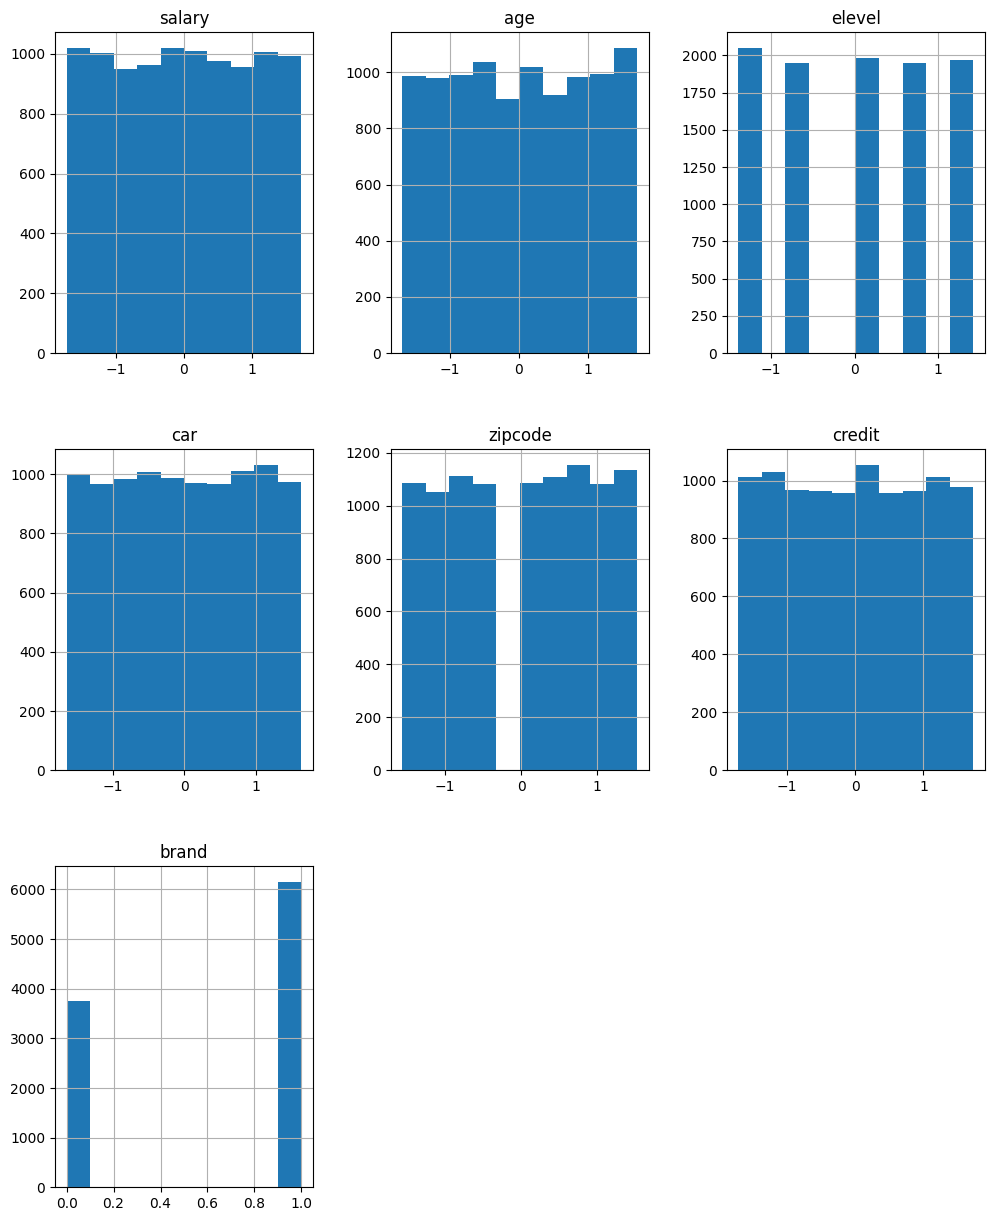

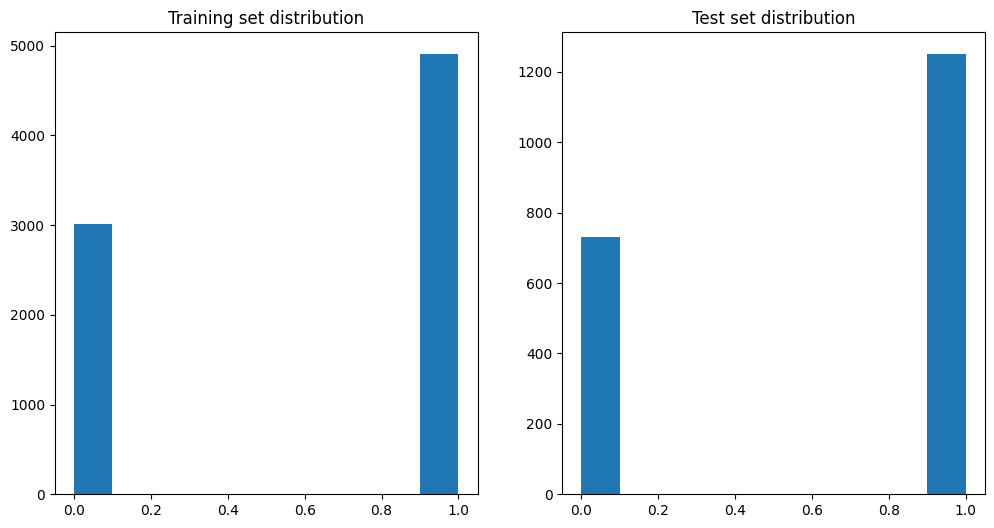

Epoch 1/100
248/248 [==============================] - 1s 2ms/step - loss: 0.6447 - accuracy: 0.6017
Epoch 2/100
248/248 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.6442
Epoch 3/100
248/248 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.6676
Epoch 4/100
248/248 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.6776
Epoch 5/100
248/248 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.6865
Epoch 6/100
248/248 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.6793
Epoch 7/100
248/248 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7132
Epoch 8/100
248/248 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8137
Epoch 9/100
248/248 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8546
Epoch 10/100
248/248 [==============================] - 1s 2ms/step - loss: 0.3666 - accura

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load data
df = pd.read_csv('CompleteResponses.csv', delimiter=',')

# Normalize data
target_col = 'brand'
X = df.drop(columns=[target_col])
means = X.mean()
stds = X.std()
for col in X.columns:
    X[col] = (X[col] - means[col]) / stds[col]
df_norm = pd.concat([X, df[target_col]], axis=1)

# Plot distributions
df_norm.hist(figsize=(12, 15))
plt.show()

# Shuffle the data
df_norm_shuffled = df_norm.sample(frac=1, random_state=42)

# Split into training and test sets
train_size = int(0.8 * len(df_norm_shuffled))
train_df = df_norm_shuffled[:train_size]
test_df = df_norm_shuffled[train_size:]

# Split into features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Plot the split datasets
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(y_train)
ax[0].set_title('Training set distribution')
ax[1].hist(y_test)
ax[1].set_title('Test set distribution')
plt.show()

# Build a neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=df_norm.shape[1]-1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
tp = np.sum(np.logical_and(y_pred_classes == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred_classes == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred_classes == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred_classes == 0, y_test == 1))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Test precision: {precision:.3}')
print(f'Test recall: {recall:.3}')
print(f'Test F1 score: {f1_score:.3}')
